In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data

--2021-04-23 12:26:59--  https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 613694 (599K) [application/x-httpd-php]
Saving to: ‘poker-hand-training-true.data’

poker-hand-training 100%[===================>] 599.31K   848KB/s    in 0.7s    

2021-04-23 12:27:01 (848 KB/s) - ‘poker-hand-training-true.data’ saved [613694/613694]



# **Logistic Regression**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [ ]:
cols = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'Class']
data = pd.read_csv('/content/poker-hand-training-true.data', names=cols)
data.head

<bound method NDFrame.head of        S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  Class
0       1  10   1  11   1  13   1  12   1   1      9
1       2  11   2  13   2  10   2  12   2   1      9
2       3  12   3  11   3  13   3  10   3   1      9
3       4  10   4  11   4   1   4  13   4  12      9
4       4   1   4  13   4  12   4  11   4  10      9
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..    ...
25005   3   9   2   6   4  11   4  12   2   4      0
25006   4   1   4  10   3  13   3   4   1  10      1
25007   2   1   2  10   4   4   4   1   4  13      1
25008   2  12   4   3   1  10   1  12   4   9      1
25009   1   7   3  11   3   3   4   8   3   7      1

[25010 rows x 11 columns]>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25010 entries, 0 to 25009
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   S1      25010 non-null  int64
 1   C1      25010 non-null  int64
 2   S2      25010 non-null  int64
 3   C2      25010 non-null  int64
 4   S3      25010 non-null  int64
 5   C3      25010 non-null  int64
 6   S4      25010 non-null  int64
 7   C4      25010 non-null  int64
 8   S5      25010 non-null  int64
 9   C5      25010 non-null  int64
 10  Class   25010 non-null  int64
dtypes: int64(11)
memory usage: 2.1 MB


In [ ]:
data.tail()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Class
25005,3,9,2,6,4,11,4,12,2,4,0
25006,4,1,4,10,3,13,3,4,1,10,1
25007,2,1,2,10,4,4,4,1,4,13,1
25008,2,12,4,3,1,10,1,12,4,9,1
25009,1,7,3,11,3,3,4,8,3,7,1


In [ ]:
res = data['Class'].unique()
res

array([9, 8, 1, 0, 4, 3, 2, 5, 6, 7])

In [ ]:
features = data.drop(['Class'],axis=1)
target = data['Class']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=42)

**Logistic**

In [ ]:
logreg_model = LogisticRegression(max_iter=4000, solver='lbfgs')
logreg_model.fit(X_train, y_train)

train_pred = logreg_model.predict(X_train)
test_pred =  logreg_model.predict(X_test)

In [ ]:
print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 49.454%
Testing Accuracy: 50.710%


**KNN Algo**

In [ ]:
k_range = range(1, 21)
train_acc = []
test_acc = []

for k in k_range:    
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    train_pred = knn_model.predict(X_train)
    test_pred =  knn_model.predict(X_test)

    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))

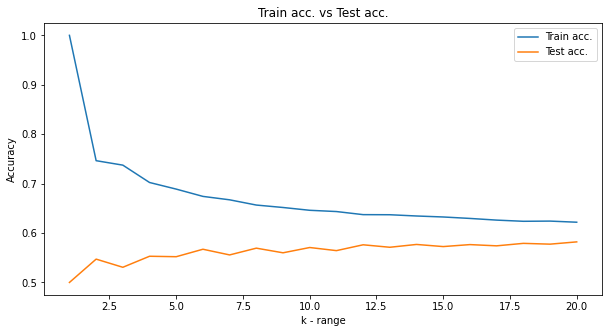

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, train_acc, label='Train acc.')
plt.plot(k_range, test_acc, label='Test acc.')
plt.legend()
plt.xlabel('k - range')
plt.ylabel('Accuracy')
plt.title('Train acc. vs Test acc.')
plt.show()

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)

train_pred = knn_model.predict(X_train)
test_pred =  knn_model.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 64.607%
Testing Accuracy: 57.077%


# **Decision Tree**

CART Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

train_pred = dt_model.predict(X_train)
test_pred =  dt_model.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 59.796%
Testing Accuracy: 52.179%


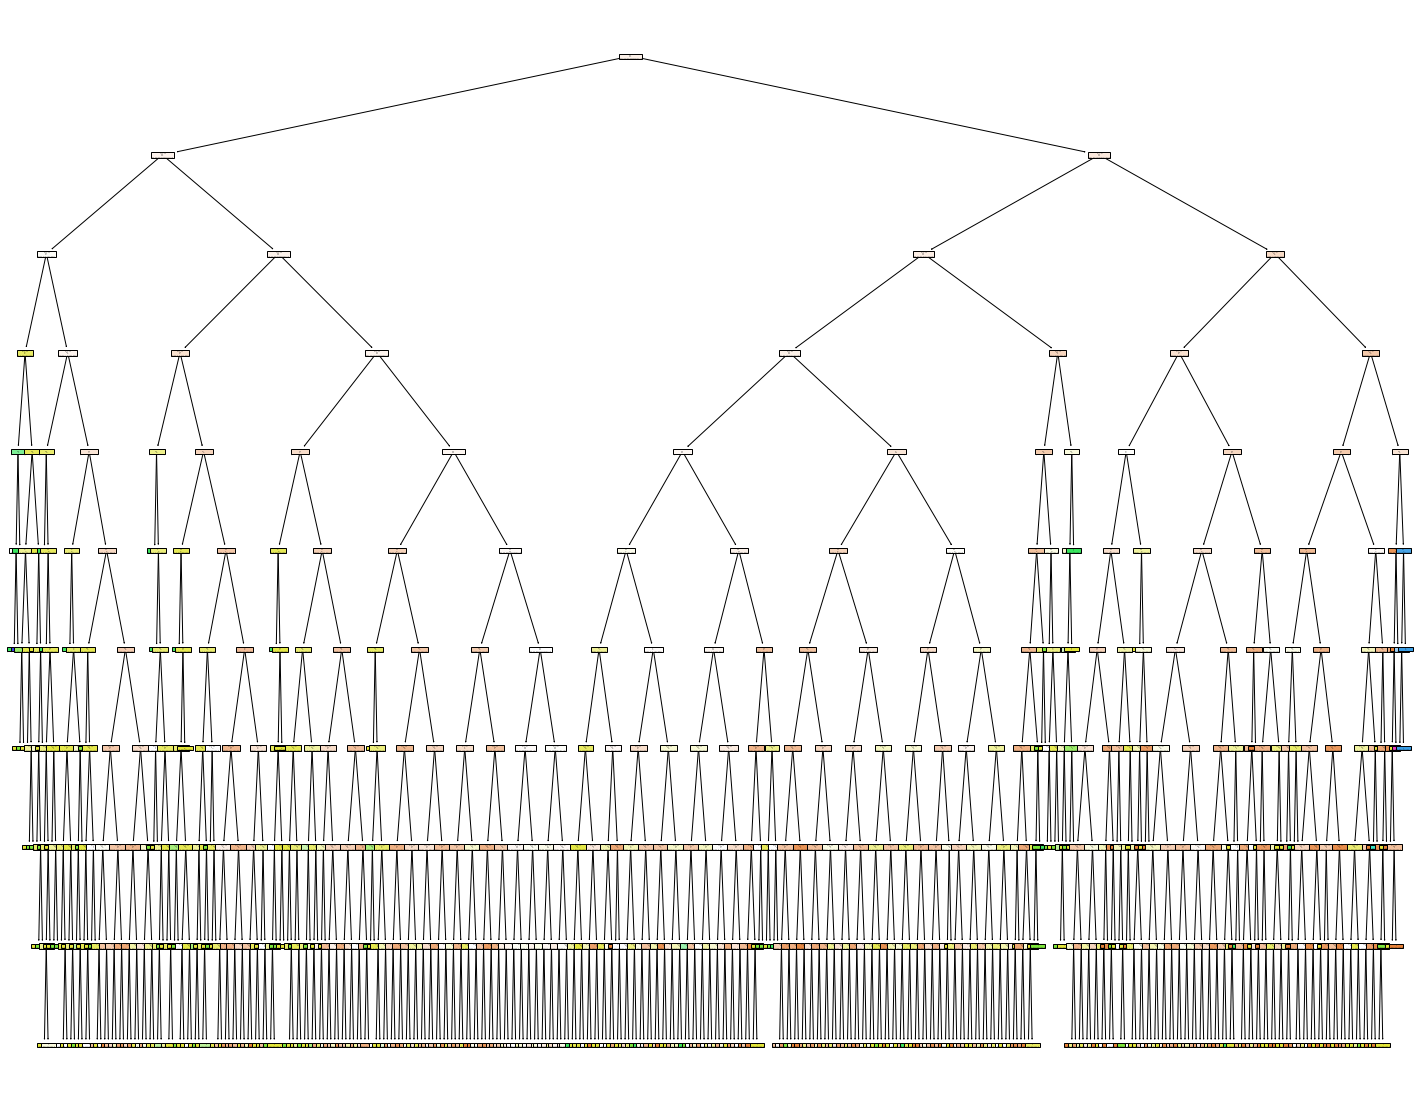

In [ ]:
fig = plt.figure(figsize=(25, 20))
plot_tree(dt_model, filled=True, feature_names=features.columns, label = 'res')
plt.show()

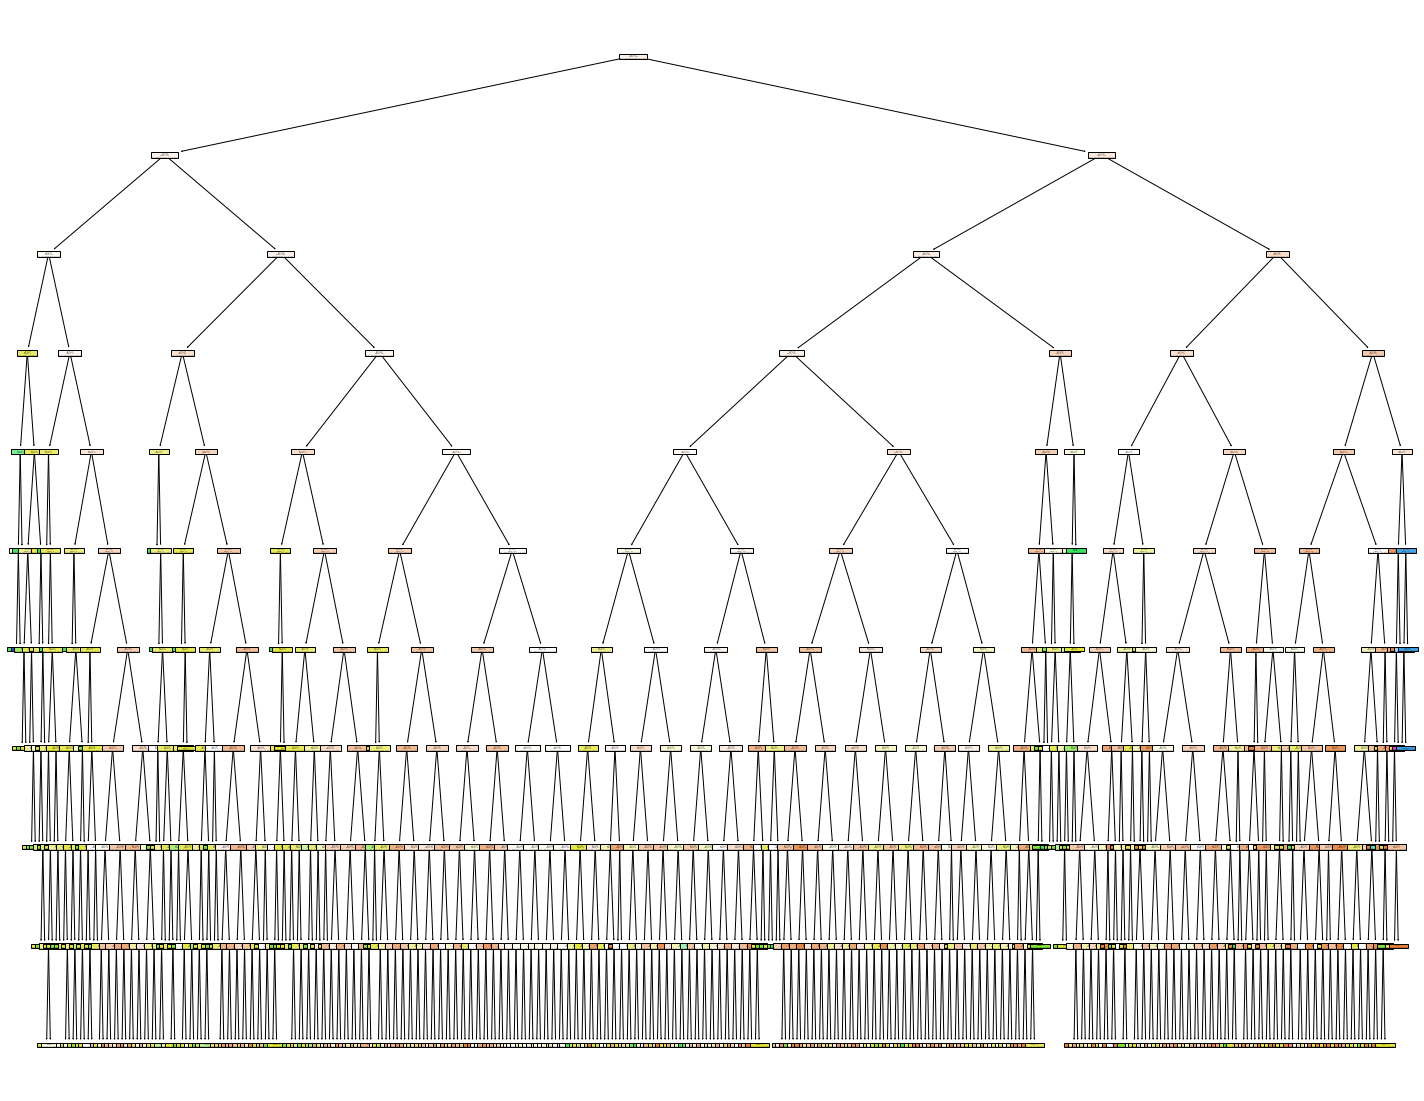

In [ ]:
fig = plt.figure(figsize=(25, 20))
plot_tree(dt_model, filled=True, feature_names=features.columns,label='all')
plt.show()

# **SVM**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [ ]:
cols = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'Class']
data = pd.read_csv('/content/poker-hand-training-true.data', names = cols,)
data.head()


,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Class
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [ ]:
data = pd.read_csv('/content/poker-hand-training-true.data',  delimiter=';')


In [ ]:
data.head()

,"1,10,1,11,1,13,1,12,1,1,9"
0,"2,11,2,13,2,10,2,12,2,1,9"
1,"3,12,3,11,3,13,3,10,3,1,9"
2,"4,10,4,11,4,1,4,13,4,12,9"
3,"4,1,4,13,4,12,4,11,4,10,9"
4,"1,2,1,4,1,5,1,3,1,6,8"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25009 entries, 0 to 25008
Data columns (total 1 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   1,10,1,11,1,13,1,12,1,1,9  25009 non-null  object
dtypes: object(1)
memory usage: 195.5+ KB


In [ ]:
data['Class'].unique()

array([9, 8, 1, 0, 4, 3, 2, 5, 6, 7])

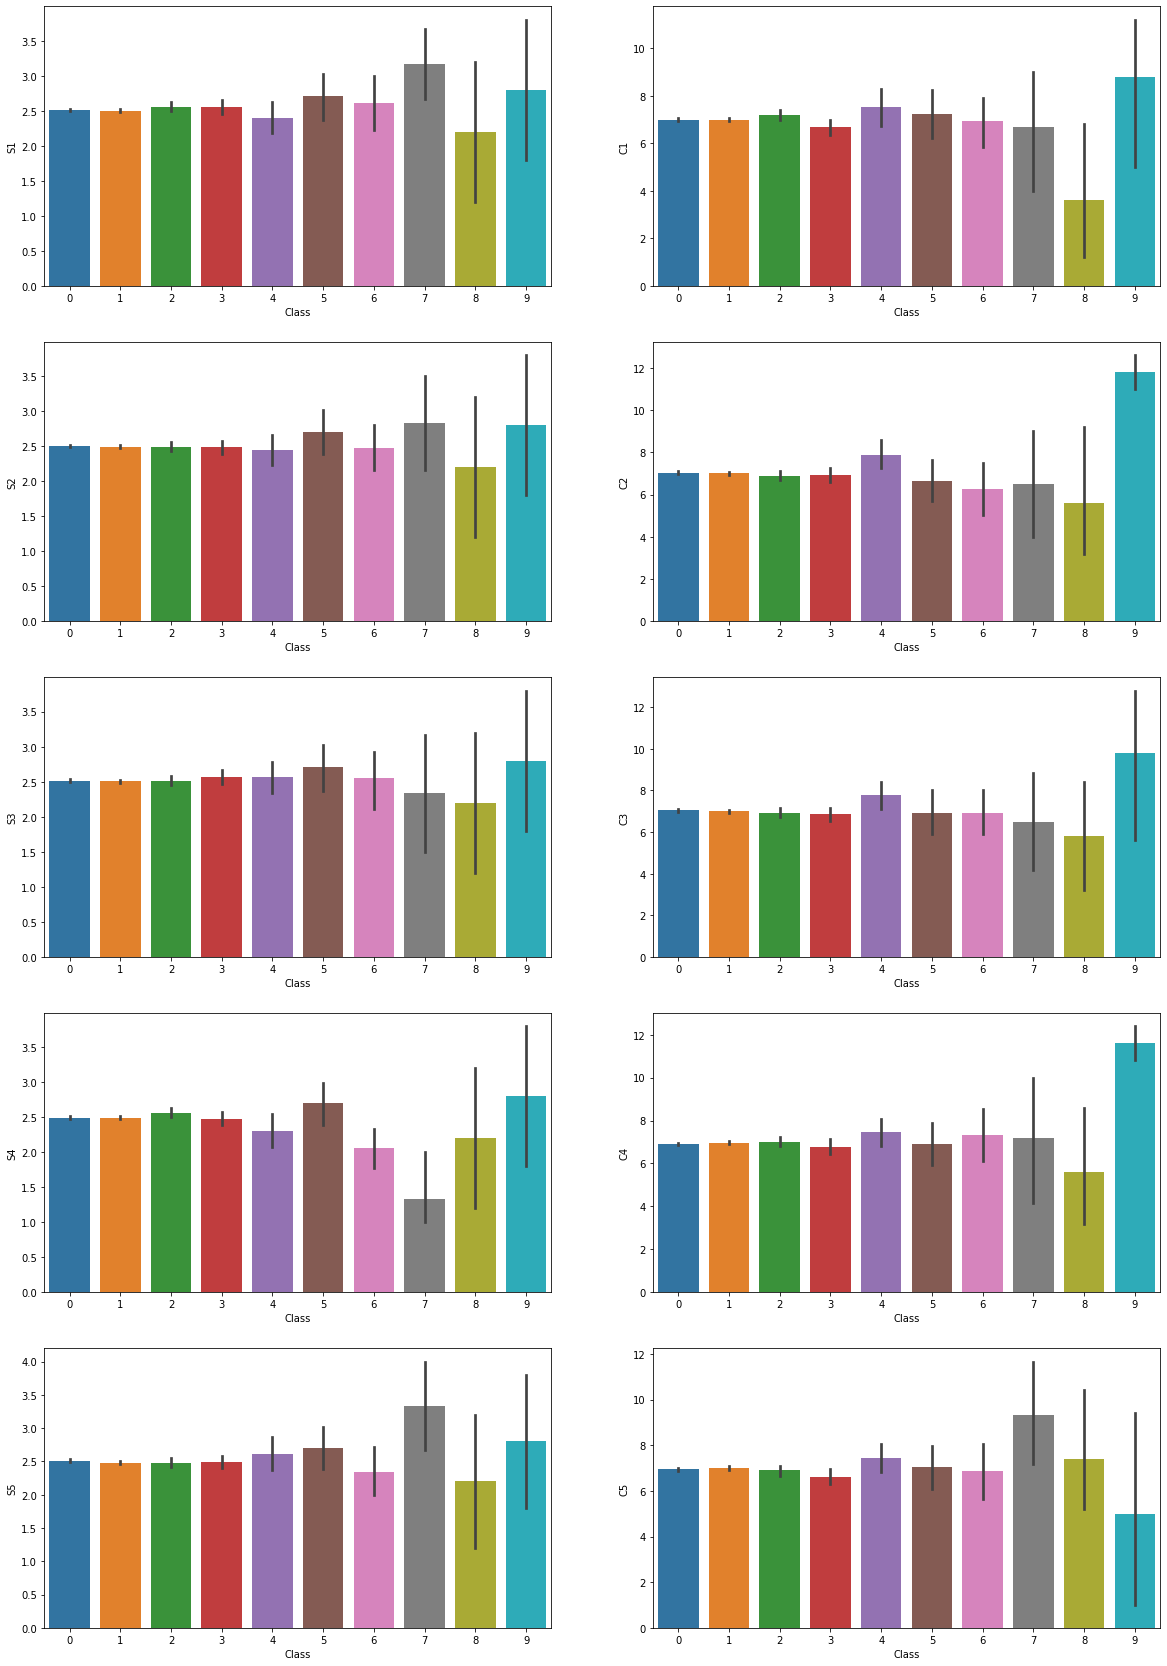

In [ ]:
def plot_bar(data, cols):
    fig = plt.figure(figsize=(20, 36))
    for loc, col in enumerate(cols):
        plt.subplot(6, 2, loc+1)
        sns.barplot(x='Class', y=col, data=data)
plot_bar(data, data.columns[:-1])
plt.show()

In [ ]:
data['Class'].value_counts()

0    12493
1    10599
2     1206
3      513
4       93
5       54
6       36
7        6
9        5
8        5
Name: Class, dtype: int64

In [ ]:
features = data.drop(['Class'], axis=1)
target = data['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
X_train.shape

(20008, 10)

In [ ]:
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

train_pred = svc_model.predict(X_train)
test_pred = svc_model.predict(X_test)

print(f"Train accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Test accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Train accuracy: 57.452%
Test accuracy: 57.497%


# **Performance metrics** 

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [ ]:
cols = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'Class']

data = pd.read_csv('/content/poker-hand-training-true.data', names=cols)


In [ ]:
data.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Class
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25010 entries, 0 to 25009
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   S1      25010 non-null  int64
 1   C1      25010 non-null  int64
 2   S2      25010 non-null  int64
 3   C2      25010 non-null  int64
 4   S3      25010 non-null  int64
 5   C3      25010 non-null  int64
 6   S4      25010 non-null  int64
 7   C4      25010 non-null  int64
 8   S5      25010 non-null  int64
 9   C5      25010 non-null  int64
 10  Class   25010 non-null  int64
dtypes: int64(11)
memory usage: 2.1 MB


In [ ]:
arr = data.values
arr

array([[ 1, 10,  1, ...,  1,  1,  9],
       [ 2, 11,  2, ...,  2,  1,  9],
       [ 3, 12,  3, ...,  3,  1,  9],
       ...,
       [ 2,  1,  2, ...,  4, 13,  1],
       [ 2, 12,  4, ...,  4,  9,  1],
       [ 1,  7,  3, ...,  3,  7,  1]])

### **Classification Accuracy**

In [22]:
X = arr[:, 0:10]
y = arr[:, 10]

k_fold = KFold(n_splits=12, random_state=42, shuffle=True)
model = LogisticRegression(max_iter=5000)

results = cross_val_score(model, X, y, cv=k_fold, scoring='accuracy')

In [24]:
results.mean()

0.4995189836614393

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=700, shuffle=True)

In [32]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [33]:
confusion_matrix(y_test, pred)

array([[3744,    0,    0,    0,    0,    0,    0,    0,    0],
       [3174,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 357,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 160,    0,    0,    0,    0,    0,    0,    0,    0],
       [  31,    0,    0,    0,    0,    0,    0,    0,    0],
       [  22,    0,    0,    0,    0,    0,    0,    0,    0],
       [  11,    0,    0,    0,    0,    0,    0,    0,    0],
       [   2,    0,    0,    0,    0,    0,    0,    0,    0],
       [   2,    0,    0,    0,    0,    0,    0,    0,    0]])

In [34]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      3744
           1       0.00      0.00      0.00      3174
           2       0.00      0.00      0.00       357
           3       0.00      0.00      0.00       160
           4       0.00      0.00      0.00        31
           5       0.00      0.00      0.00        22
           6       0.00      0.00      0.00        11
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2

    accuracy                           0.50      7503
   macro avg       0.06      0.11      0.07      7503
weighted avg       0.25      0.50      0.33      7503



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
